In [1]:
from twobox import *
import pickle
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
def twoboxGenerate(parameters, sample_length, sample_number):
    #datestring = datetime.strftime(datetime.now(), '%Y-%m-%d-%H-%M-%S')
    datestring = datetime.strftime(datetime.now(), '%m%d%Y(%H%M)')   # current time used to set file name


    print("\nSet the parameters of the model... \n")
    ### Set all related parameters
    discount = 0.99  # temporal discount , used to solve the MDP with value iteration

    nq = 5  # number of belief states per box
    nr = 2  # number of reward states
    nl = 3  # number of location states
    na = 5
    
#     beta = parameters[0]
#     gamma1 = parameters[1]
#     gamma2 = parameters[2]
#     delta =  parameters[3]
#     direct = parameters[4]
#     epsilon1 = parameters[5]
#     epsilon2 = parameters[6]
#     rho = parameters[7]
#     # State rewards
#     Reward = 1 
#     groom = parameters[8]
#     # Action costs
#     travelCost = parameters[9]
#     pushButtonCost = parameters[10]
    
    beta = 0     # available food dropped back into box after button press
    gamma1 = parameters[0]   # reward becomes available in box 1
    gamma2 = parameters[1]   # reward becomes available in box 2
    delta = 0    # animal trips, doesn't go to target location
    direct = 0   # animal goes right to target, skipping location 0
    epsilon1 = parameters[2] # available food disappears from box 1
    epsilon2 = parameters[3] # available food disappears from box 2
    rho = 1      # food in mouth is consumed
    # State rewards
    Reward = 1   # reward per time step with food in mouth
    groom = parameters[4]     # location 0 reward
    # Action costs
    travelCost = parameters[5]
    pushButtonCost = parameters[6]
        

#     beta = 0.001 * 0  # .001     # available food dropped back into box after button press
#     gamma1 = 1/25   #.3   #.1     # reward becomes available in box 1
#     gamma2 = 1/15   #.001   #.1  # .1 / scale   # reward becomes available in box 2
#     delta = 0.001 * 0  # .001    # animal trips, doesn't go to target location
#     direct = 0.001 * 0  # .001   # animal goes right to target, skipping location 0
#     epsilon1 = 0  #.1   #.01  # available food disappears from box 1
#     epsilon2 = 0  #.999   #.01  # available food disappears from box 2
#     rho = 1           # .999      # food in mouth is consumed
#     # eta = .0001        # random diffusion of belief

#     # State rewards
#     Reward = 1 #3  # reward per time step with food in mouth
#     groom = 0   #0.01   #0.05  # 0.1     # location 0 reward

#     # Action costs
#     travelCost = 0.1  # 0.1
#     pushButtonCost = .2  # 0.1
    

    # parameters = [beta, gamma1, gamma2, delta, direct, epsilon1, epsilon2,
    #               rho, Groom, travelCost, pushButtonCost]
    #parameters = [gamma1, gamma2, epsilon1, epsilon2,
    #              groom, travelCost, pushButtonCost]

    ### Solving the MDP problem with given parameters

    print("Solving the belief MDP...")
    twobox = twoboxMDP(discount, nq, nr, na, nl, parameters)
    twobox.setupMDP()
    twobox.solveMDP_sfm(initial_value = 0)

    fig  = plt.figure(figsize = (20, 2))
    ax = fig.add_subplot(111)
    policyfig =  ax.imshow(twobox.softpolicy)
    fig.colorbar(policyfig)
    plt.show()
    #print np.max(np.abs(Q_sfm - twobox.Qsfm))
    #print np.max(softpolicy - twobox.softpolicy)


    ### Gnerate data"""
    print("Generate data based on the true model...")
    T = sample_length
    N = sample_number
    twoboxdata = twoboxMDPdata(discount, nq, nr, na, nl, parameters, T, N)
    twoboxdata.dataGenerate_sfm(belief1Initial=0, rewInitial=0, belief2Initial=0, locationInitial=0)
    #twoboxdata.dataGenerate_op(belief1Initial=0, rewInitial=0, belief2Initial=0, locationInitial=0)
    hybrid = twoboxdata.hybrid
    action = twoboxdata.action
    location = twoboxdata.location
    belief1 = twoboxdata.belief1
    belief2 = twoboxdata.belief2
    reward = twoboxdata.reward
    trueState1 = twoboxdata.trueState1
    trueState2 = twoboxdata.trueState2

    # sampleNum * sampleTime * dim of observations(=3 here, action, reward, location)
    # organize data
    obsN = np.dstack([action, reward, location])  # includes the action and the observable states
    latN = np.dstack([belief1, belief2])
    truthN = np.dstack([trueState1, trueState2])
    #dataN = np.dstack([obsN, latN, truthN])

#     ### write data to file
#     data_dict = {'observations': obsN,
#                  'beliefs': latN,
#                  'trueStates': truthN,
#                  'allData': dataN}
#     data_output = open(datestring + '_dataN_twobox' + '.pkl', 'wb')
#     pickle.dump(data_dict, data_output)
#     data_output.close()

#     ### write all model parameters to file
#     para_dict = {'discount': discount,
#                  'nq': nq,
#                  'nr': nr,
#                  'nl': nl,
#                  'na': na,
#                  'foodDrop': beta,
#                  'appRate1': gamma1,
#                  'appRate2': gamma2,
#                  'disappRate1': epsilon1,
#                  'disappRate2': epsilon2,
#                  'consume': rho,
#                  'reward': Reward,
#                  'groom': groom,
#                  'travelCost': travelCost,
#                  'pushButtonCost': pushButtonCost
#                  }
#     para_output = open(datestring + '_para_twobox' + '.pkl', 'wb')
#     pickle.dump(para_dict, para_output)
#     para_output.close()

#     pkl_file1 = open(datestring + '_para_twobox' + '.pkl', 'rb')
#     para_pkl = pickle.load(pkl_file1)
#     pkl_file1.close()

#    print('Data stored in files' )

    return obsN, latN, truthN

In [3]:
#parameters = [gamma1, gamma2, epsilon1, epsilon2,
#              groom, travelCost, pushButtonCost]
parameters = [0.1, 0.1, 0.01, 0.01, 
              0.05, 0.2, 0.3]


Set the parameters of the model... 

Solving the belief MDP...


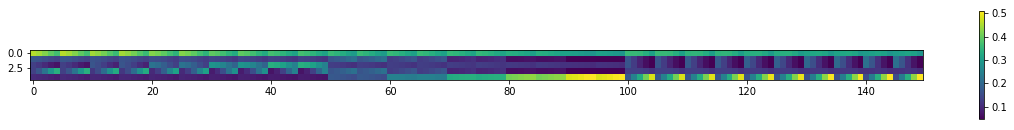

Generate data based on the true model...


In [4]:
obsN, latN, truthN = twoboxGenerate(parameters, sample_length = 5000, sample_number = 1)

In [5]:
latN[0]

array([[0, 0],
       [1, 1],
       [1, 1],
       ...,
       [4, 2],
       [4, 2],
       [2, 0]])

# EM

In [6]:
discount = 0.99  # temporal discount , used to solve the MDP with value iteration

nq = 5  # number of belief states per box
nr = 2  # number of reward states
nl = 3  # number of location states
na = 5



In [7]:
sampleIndex = [0]
NN = len(sampleIndex)

In [8]:
parameters

[0.1, 0.1, 0.01, 0.01, 0.05, 0.2, 0.3]

In [9]:
parameters_iniSet = [[0.05,0.05,0.15,0.15,0.03,0.25,0.33]]
E_MAX_ITER = 300       # 100    # maximum number of iterations of E-step
GD_THRESHOLD = 0.015   # 0.01      # stopping criteria of M-step (gradient descent)
E_EPS = 10 ** -8                  # stopping criteria of E-step
M_LR_INI = 5 * 10 ** -5           # initial learning rate in the gradient descent step
LR_DEC =  3                       # number of times that the learning rate can be reduced


In [11]:
#### EM algorithm for parameter estimation
print("\nEM algorithm begins ...")
# NN denotes multiple data set, and MM denotes multiple initial points
NN_MM_para_old_traj = []

NN_MM_para_new_traj = []
NN_MM_log_likelihoods_old = []
NN_MM_log_likelihoods_new = []
NN_MM_log_likelihoods_com_old = []    # old posterior, old parameters
NN_MM_log_likelihoods_com_new = []    # old posterior, new parameters
NN_MM_latent_entropies = []

NN_likelihoods = []

for nn in range(NN):

    print("\nFor the", sampleIndex[nn] + 1, "-th set of data:")

    ##############################################################
    # Compute likelihood
    lat = latN[sampleIndex[nn]]
    obs = obsN[sampleIndex[nn], :, :]

    MM = len(parameters_iniSet)

    MM_para_old_traj = []
    MM_para_new_traj = []
    MM_log_likelihoods_old = []
    MM_log_likelihoods_new = []
    MM_log_likelihoods_com_old = []    # old posterior, old parameters
    MM_log_likelihoods_com_new = []    # old posterior, new parameters
    MM_latent_entropies = []

    for mm in range(MM):
        parameters_old = np.copy(parameters_iniSet[mm])

        print("\n", mm + 1, "-th initial estimation:", parameters_old)

        itermax = E_MAX_ITER #100  # iteration number for the EM algorithm
        eps = E_EPS   # Stopping criteria for E-step in EM algorithm

        para_old_traj = []
        para_new_traj = []

        log_likelihoods_old = []
        log_likelihoods_new = []
        log_likelihoods_com_old = []  # old posterior, old parameters
        log_likelihoods_com_new = []  # old posterior, new parameters
        latent_entropies = []

        count_E = 0
        while count_E < itermax:

            print("\n The", count_E + 1, "-th iteration of the EM(G) algorithm")

            if count_E == 0:
                parameters_old = np.copy(parameters_iniSet[mm])
            else:
                parameters_old = np.copy(parameters_new)  # update parameters

            para_old_traj.append(parameters_old)

            ##########  E-step ##########

            ## Use old parameters to estimate posterior

            #twoboxGra = twoboxMDPder(discount, nq, nr, na, nl, parameters_old, vinitial)
            twoboxGra = twoboxMDPder(discount, nq, nr, na, nl, parameters_old)
            ThA_old = twoboxGra.ThA
            softpolicy_old = twoboxGra.softpolicy
            pi = np.ones(nq * nq) / nq / nq
            twoHMM = HMMtwobox(ThA_old, softpolicy_old, pi)

            ## Calculate likelihood of observed and complete date, and entropy of the latent sequence
            complete_likelihood_old = twoHMM.computeQaux(obs, ThA_old, softpolicy_old)
            latent_entropy = twoHMM.latent_entr(obs)
            log_likelihood = complete_likelihood_old + latent_entropy

            log_likelihoods_com_old.append(complete_likelihood_old)
            latent_entropies.append(latent_entropy)
            log_likelihoods_old.append(log_likelihood)

            print(parameters_old)
            print(complete_likelihood_old)
            print(log_likelihood)

            ## Check convergence
            if len(log_likelihoods_old) >= 2 and np.abs(log_likelihood - log_likelihoods_old[-2]) < eps:
                print("EM has converged!")
                break

            ##########  M(G)-step ##########

            count_M = 0
            vinitial = 0
            para_new_traj.append([])
            log_likelihoods_com_new.append([])
            log_likelihoods_new.append([])
            
            learnrate_ini = M_LR_INI
            learnrate = learnrate_ini

            # Start the gradient descent from the old parameters
            parameters_new = np.copy(parameters_old)
            complete_likelihood_new = complete_likelihood_old
            log_likelihood = complete_likelihood_new + latent_entropy

            para_new_traj[count_E].append(parameters_new)
            log_likelihoods_com_new[count_E].append(complete_likelihood_new)
            log_likelihoods_new[count_E].append(log_likelihood)

            print("    M-step")
            print("     ", parameters_new)
            print("     ", complete_likelihood_new)
            print("     ", log_likelihood)

            while True:
                
                derivative_value = twoboxGra.dQauxdpara(obs, parameters_new, vinitial)  
                # vinitial is value from previous iteration, this is for computational efficiency
                para_temp = parameters_new + learnrate * np.array(derivative_value[:-1])
                vinitial = derivative_value[-1]  # value iteration starts with value from previous iteration

#                 if parameterMain_dict['optimizer'] == 'GD':
#                     ## standard gradient descent algorithm
#                     #start = timeit.timeit()
#                     derivative_value = twoboxGra.dQauxdpara(obs, parameters_new,
#                                                             vinitial)  # vinitial is value from previous iteration, this is for computational efficiency
#                     #print(timeit.timeit() - start)
#                     para_temp = parameters_new + learnrate * np.array(derivative_value[:-1])
#                     vinitial = derivative_value[-1]  # value iteration starts with value from previous iteration

#                 elif parameterMain_dict['optimizer'] == 'PGD':
#                     ## Go the potential next point with PROJECTED gradient descent
#                     parameters_new_pro = - np.log(1 / parameters_new - 1)  # projected back onto the whole real axis
#                     sig_deri = np.exp(- parameters_new_pro) / (np.exp(-parameters_new_pro) + 1) ** 2
#                     start = timeit.timeit()
#                     derivative_value = twoboxGra.dQauxdpara(obs, parameters_new, vinitial)
#                     print(timeit.timeit() - start)
#                     para_temp = parameters_new_pro + learnrate * np.array(derivative_value[:-1]) * sig_deri
#                     para_temp = 1 / (1 + np.exp(- para_temp))  # projected onto [0,1]
#                     vinitial = derivative_value[-1]

                ## Check the ECDLL (old posterior, new parameters)
                twobox_new = twoboxMDP(discount, nq, nr, na, nl, para_temp)
                twobox_new.setupMDP()
                twobox_new.solveMDP_sfm()
                ThA_new = twobox_new.ThA
                softpolicy_new = twobox_new.softpolicy
                complete_likelihood_new_temp = twoHMM.computeQaux(obs, ThA_new, softpolicy_new)

                print("         ", para_temp)
                print("         ", complete_likelihood_new_temp)

                ## Update the parameter if the ECDLL can be improved
                if complete_likelihood_new_temp > complete_likelihood_new + GD_THRESHOLD:
                    parameters_new = np.copy(para_temp)
                    complete_likelihood_new = complete_likelihood_new_temp
                    log_likelihood = complete_likelihood_new + latent_entropy

                    para_new_traj[count_E].append(parameters_new)
                    log_likelihoods_com_new[count_E].append(complete_likelihood_new)
                    log_likelihoods_new[count_E].append(log_likelihood)

                    print("     ", parameters_new)
                    print("     ", complete_likelihood_new)
                    print("     ", log_likelihood)

                    count_M += 1
                else:
                    learnrate /= 2
                    if learnrate < learnrate_ini / (2 ** LR_DEC):
                        break

            count_E += 1

        MM_para_old_traj.append(para_old_traj)  # parameter trajectories for a particular set of data
        MM_para_new_traj.append(para_new_traj)
        MM_log_likelihoods_old.append(log_likelihoods_old)  # likelihood trajectories for a particular set of data
        MM_log_likelihoods_new.append(log_likelihoods_new)
        MM_log_likelihoods_com_old.append(log_likelihoods_com_old)    # old posterior, old parameters
        MM_log_likelihoods_com_new.append(log_likelihoods_com_new)    # old posterior, new parameters
        MM_latent_entropies.append(latent_entropies)

    NN_MM_para_old_traj.append(MM_para_old_traj)  # parameter trajectories for all data
    NN_MM_para_new_traj.append(MM_para_new_traj)
    NN_MM_log_likelihoods_old.append(MM_log_likelihoods_old)  # likelihood trajectories for
    NN_MM_log_likelihoods_new.append(MM_log_likelihoods_new)
    NN_MM_log_likelihoods_com_old.append(MM_log_likelihoods_com_old)   # old posterior, old parameters
    NN_MM_log_likelihoods_com_new.append(MM_log_likelihoods_com_new)   # old posterior, new parameters
    NN_MM_latent_entropies.append(MM_latent_entropies)



EM algorithm begins ...

For the 1 -th set of data:

 1 -th initial estimation: [0.05 0.05 0.15 0.15 0.03 0.25 0.33]

 The 1 -th iteration of the EM(G) algorithm
[0.05 0.05 0.15 0.15 0.03 0.25 0.33]
-15433.539871082305
-7824.236676658971
    M-step
      [0.05 0.05 0.15 0.15 0.03 0.25 0.33]
      -15433.539871082305
      -7824.236676658971
          [ 0.15539157  0.14290793  0.08784438  0.09253621 -0.12766458  0.19265931
  0.30420397]
          -17672.97360896301
          [ 0.10269578  0.09645397  0.11892219  0.12126811 -0.04883229  0.22132966
  0.31710199]
          -15970.402669135841
          [ 0.07634789  0.07322698  0.13446109  0.13563405 -0.00941615  0.23566483
  0.32355099]
          -15493.399508720686
          [0.06317395 0.06161349 0.14223055 0.14281703 0.01029193 0.24283241
 0.3267755 ]
          -15394.966101458605
      [0.06317395 0.06161349 0.14223055 0.14281703 0.01029193 0.24283241
 0.3267755 ]
      -15394.966101458605
      -7785.662907035272
          [0.060694

          [0.0562616  0.05414076 0.12468398 0.12384486 0.0170573  0.20379389
 0.32119552]
          -15352.693120554888

 The 2 -th iteration of the EM(G) algorithm
[0.05633342 0.0542197  0.12483952 0.12401509 0.01703888 0.20386058
 0.32138825]
-15563.764231369212
-7713.565033705689
    M-step
      [0.05633342 0.0542197  0.12483952 0.12401509 0.01703888 0.20386058
 0.32138825]
      -15563.764231369212
      -7713.565033705689
          [0.12786499 0.11995237 0.07524796 0.07555901 0.02932642 0.2016747
 0.32655365]
          -16208.494333784965
          [0.09209921 0.08708604 0.10004374 0.09978705 0.02318265 0.20276764
 0.32397095]
          -15645.655623664155
          [0.07421631 0.07065287 0.11244163 0.11190107 0.02011076 0.20331411
 0.3226796 ]
          -15547.267051516861
      [0.07421631 0.07065287 0.11244163 0.11190107 0.02011076 0.20331411
 0.3226796 ]
      -15547.267051516861
      -7697.0678538533375
          [0.06078937 0.05867016 0.11596484 0.11447451 0.02289197 0.202

          [0.12258776 0.11492236 0.04476806 0.03979208 0.03242835 0.2066286
 0.34204527]
          -16190.826545825414
          [0.09489225 0.08862921 0.06658745 0.0621048  0.02682447 0.20692714
 0.33853883]
          -15836.227965654893
          [0.0810445  0.07548263 0.07749715 0.07326117 0.02402253 0.20707641
 0.33678561]
          -15774.464782297922
      [0.0810445  0.07548263 0.07749715 0.07326117 0.02402253 0.20707641
 0.33678561]
      -15774.464782297922
      -7602.719019102485
          [0.07163949 0.06655636 0.0806895  0.07581039 0.02599323 0.20713771
 0.33846962]
          -15771.247881879139
      [0.07163949 0.06655636 0.0806895  0.07581039 0.02599323 0.20713771
 0.33846962]
      -15771.247881879139
      -7599.502118683701
          [0.07648234 0.070346   0.07667081 0.07197496 0.02254226 0.20804175
 0.33867061]
          -15769.840979808985
      [0.07648234 0.070346   0.07667081 0.07197496 0.02254226 0.20804175
 0.33867061]
      -15769.840979808985
      -7598.095

          [0.08353666 0.07476547 0.05511124 0.04644413 0.0265489  0.21241241
 0.35648227]
          -15847.542271178429
      [0.08353666 0.07476547 0.05511124 0.04644413 0.0265489  0.21241241
 0.35648227]
      -15847.542271178429
      -7542.696467586502
          [0.08246408 0.07424776 0.05546607 0.04630455 0.02694921 0.21252086
 0.35722941]
          -15847.471335165477
      [0.08246408 0.07424776 0.05546607 0.04630455 0.02694921 0.21252086
 0.35722941]
      -15847.471335165477
      -7542.625531573551
          [0.08300714 0.0742194  0.05493994 0.04600272 0.02650515 0.21274263
 0.35771845]
          -15847.426208995981
      [0.08300714 0.0742194  0.05493994 0.04600272 0.02650515 0.21274263
 0.35771845]
      -15847.426208995981
      -7542.5804054040545
          [0.08250692 0.07408223 0.0550943  0.0458412  0.02661219 0.21285001
 0.35826574]
          -15847.39626452063
      [0.08250692 0.07408223 0.0550943  0.0458412  0.02661219 0.21285001
 0.35826574]
      -15847.3962645206

          [0.11555155 0.10142632 0.02181959 0.00926676 0.03438501 0.21557045
 0.37655916]
          -15891.631562155384
          [0.10344004 0.09072937 0.03212314 0.01978243 0.03180008 0.21560006
 0.37437926]
          -15828.663247459484
          [0.09738428 0.08538089 0.03727491 0.02504027 0.03050762 0.21561487
 0.37328931]
          -15817.90159089267
      [0.09738428 0.08538089 0.03727491 0.02504027 0.03050762 0.21561487
 0.37328931]
      -15817.90159089267
      -7506.7270401450805
          [0.09415001 0.0825661  0.03926543 0.02630656 0.03176292 0.21562015
 0.3744054 ]
          -15817.361161603792
      [0.09415001 0.0825661  0.03926543 0.02630656 0.03176292 0.21562015
 0.3744054 ]
      -15817.361161603792
      -7506.186610856203
          [0.09585781 0.08345079 0.0379122  0.02517954 0.03058023 0.21597014
 0.37488377]
          -15817.164751569591
      [0.09585781 0.08345079 0.0379122  0.02517954 0.03058023 0.21597014
 0.37488377]
      -15817.164751569591
      -7505.990

          [0.11657541 0.0993453  0.01990341 0.00395177 0.03545916 0.21796516
 0.38982741]
          -15768.959064022796
          [0.10905293 0.09307498 0.0260615  0.01020367 0.03394483 0.21795051
 0.38824199]
          -15746.746718131028
          [0.10529169 0.08993981 0.02914055 0.01332962 0.03318767 0.21794318
 0.38744929]
          -15742.989234692042
      [0.10529169 0.08993981 0.02914055 0.01332962 0.03318767 0.21794318
 0.38744929]
      -15742.989234692042
      -7492.908149750452
          [0.10353136 0.08849085 0.03053466 0.01408287 0.0340526  0.21794157
 0.38828408]
          -15742.791304209897
      [0.10353136 0.08849085 0.03053466 0.01408287 0.0340526  0.21794157
 0.38828408]
      -15742.791304209897
      -7492.710219268307
          [0.10460322 0.0889193  0.02979803 0.01352897 0.03336437 0.21815623
 0.38871101]
          -15742.71516146312
      [0.10460322 0.0889193  0.02979803 0.01352897 0.03336437 0.21815623
 0.38871101]
      -15742.71516146312
      -7492.6340

          [0.11106225 0.09279064 0.02636449 0.0069904  0.03520768 0.21954739
 0.3990256 ]
          -15676.950192194594
          [0.11111627 0.09279693 0.02628993 0.00700138 0.03520857 0.21952164
 0.39883687]
          -15676.956109656654

 The 16 -th iteration of the EM(G) algorithm
[0.11117028 0.09280321 0.02621536 0.00701235 0.03520947 0.21949588
 0.39864813]
-15658.81034636589
-7486.872756018683
    M-step
      [0.11117028 0.09280321 0.02621536 0.00701235 0.03520947 0.21949588
 0.39864813]
      -15658.81034636589
      -7486.872756018683
          [1.19548654e-01 9.96692092e-02 2.00106917e-02 3.14086601e-04
 3.68681676e-02 2.19577019e-01 4.01068004e-01]
          -15665.762835266858
          [0.11535947 0.09623621 0.02311303 0.00366322 0.03603882 0.21953645
 0.39985807]
          -15659.494791223404
          [0.11326487 0.09451971 0.0246642  0.00533779 0.03562414 0.21951616
 0.3992531 ]
          -15658.455760227529
      [0.11326487 0.09451971 0.0246642  0.00533779 0.03562414

          [0.11873275 0.09744176 0.02365287 0.00156091 0.03713329 0.22041545
 0.40714116]
          -15603.19851243904
      [0.11873275 0.09744176 0.02365287 0.00156091 0.03713329 0.22041545
 0.40714116]
      -15603.19851243904
      -7484.328992874181
          [0.1186223  0.09740256 0.02388125 0.00158769 0.03717079 0.22045591
 0.40751799]
          -15603.184393576186
          [0.11867752 0.09742216 0.02376706 0.0015743  0.03715204 0.22043568
 0.40732957]
          -15603.19023440624

 The 21 -th iteration of the EM(G) algorithm
[0.11873275 0.09744176 0.02365287 0.00156091 0.03713329 0.22041545
 0.40714116]
-15592.09124368253
-7484.1858546172925
    M-step
      [0.11873275 0.09744176 0.02365287 0.00156091 0.03713329 0.22041545
 0.40714116]
      -15592.09124368253
      -7484.1858546172925
          [ 0.12320086  0.10099856  0.02101532 -0.00172091  0.03815802  0.22050692
  0.40912863]
          -15593.706495621806
          [ 1.20966803e-01  9.92201597e-02  2.23340964e-02 -8.0002

[ 0.1230357   0.10014932  0.02326485 -0.00082066  0.0382709   0.22087382
  0.41216713]
-15557.245353818274
-7483.353244778048
    M-step
      [ 0.1230357   0.10014932  0.02326485 -0.00082066  0.0382709   0.22087382
  0.41216713]
      -15557.245353818274
      -7483.353244778048
          [ 0.12634502  0.10219624  0.02181158 -0.00250557  0.03801015  0.2210903
  0.41355462]
          -15557.884728390722
          [ 0.12469036  0.10117278  0.02253822 -0.00166311  0.03814053  0.22098206
  0.41286087]
          -15557.290977901026
          [ 0.12386303  0.10066105  0.02290153 -0.00124189  0.03820571  0.22092794
  0.412514  ]
          -15557.199776431116
      [ 0.12386303  0.10066105  0.02290153 -0.00124189  0.03820571  0.22092794
  0.412514  ]
      -15557.199776431116
      -7483.30766739089
          [ 0.123671    0.10051975  0.02332926 -0.0010976   0.03836681  0.22094417
  0.41289489]
          -15557.180711835343
      [ 0.123671    0.10051975  0.02332926 -0.0010976   0.03836681  0

          [ 0.12682873  0.10202473  0.02433939 -0.00181637  0.03879215  0.22131987
  0.41697231]
          -15533.088495849008
          [ 0.12718561  0.10237407  0.02384423 -0.002181    0.03891882  0.22127175
  0.41673177]
          -15533.04231892742
      [ 0.12718561  0.10237407  0.02384423 -0.002181    0.03891882  0.22127175
  0.41673177]
      -15533.04231892742
      -7482.903506130048
          [ 0.12745588  0.10251009  0.02371697 -0.0022602   0.03874531  0.22131932
  0.41693046]
          -15533.033858183844
          [ 0.12732074  0.10244208  0.0237806  -0.0022206   0.03883207  0.22129553
  0.41683112]
          -15533.03610000048

 The 33 -th iteration of the EM(G) algorithm
[ 0.12718561  0.10237407  0.02384423 -0.002181    0.03891882  0.22127175
  0.41673177]
-15532.052682492242
-7482.895327809351
    M-step
      [ 0.12718561  0.10237407  0.02384423 -0.002181    0.03891882  0.22127175
  0.41673177]
      -15532.052682492242
      -7482.895327809351
          [ 0.12927187  

          [ 0.13112889  0.10462552  0.02490304 -0.00291691  0.03911953  0.22156777
  0.42039829]
          -15515.97061664313
          [ 0.13083368  0.10441506  0.0248565  -0.00283434  0.03920424  0.22154857
  0.42025326]
          -15515.969290051333
          [ 0.13068608  0.10430983  0.02483322 -0.00279306  0.03924659  0.22153897
  0.42018075]
          -15515.972901912035

 The 40 -th iteration of the EM(G) algorithm
[ 0.13053848  0.1042046   0.02480995 -0.00275178  0.03928895  0.22152938
  0.42010824]
-15515.979361726364
-7482.66390904075
EM has converged!


In [75]:
para_traj = [k for i in NN_MM_para_new_traj[0] for j in i  for k in j]

In [76]:
len(para_traj)

238

In [13]:
NN_MM_para_old_traj

[[[array([0.05, 0.05, 0.15, 0.15, 0.03, 0.25, 0.33]),
   array([0.05633342, 0.0542197 , 0.12483952, 0.12401509, 0.01703888,
          0.20386058, 0.32138825]),
   array([0.06189032, 0.05838524, 0.1052129 , 0.10300101, 0.01927609,
          0.20477054, 0.32655073]),
   array([0.06719674, 0.06233606, 0.08840685, 0.08441753, 0.0212206 ,
          0.20722568, 0.3350324 ]),
   array([0.07278158, 0.06634374, 0.07456081, 0.06891817, 0.02291778,
          0.20944229, 0.34334722]),
   array([0.07773356, 0.07035769, 0.06367201, 0.05610166, 0.02485071,
          0.2113525 , 0.35140265]),
   array([0.08252017, 0.07396177, 0.05491422, 0.04561409, 0.02640608,
          0.21308301, 0.35910626]),
   array([0.08716104, 0.07717489, 0.04790936, 0.03717191, 0.02786146,
          0.21445198, 0.36583854]),
   array([0.09132853, 0.08003242, 0.04242668, 0.03029811, 0.02921515,
          0.21562967, 0.37219936]),
   array([0.09498984, 0.08260688, 0.03822072, 0.02472348, 0.03049911,
          0.21652911, 0.3775

In [14]:
MM_log_likelihoods_old

[[-7824.236676658971,
  -7713.565033705689,
  -7660.406033856618,
  -7615.550664539941,
  -7579.7969799890725,
  -7553.172869821234,
  -7533.672045082505,
  -7519.635024469906,
  -7509.683678532547,
  -7502.705560312095,
  -7497.69165961245,
  -7494.0314207214,
  -7491.435066261014,
  -7489.497398187552,
  -7488.001389089237,
  -7486.872756018683,
  -7486.076786950933,
  -7485.449998903642,
  -7484.950030960122,
  -7484.520211644084,
  -7484.1858546172925,
  -7483.919002687046,
  -7483.703060976252,
  -7483.567680306419,
  -7483.453017180092,
  -7483.353244778048,
  -7483.265773589869,
  -7483.188619631781,
  -7483.120209514498,
  -7483.0546531452865,
  -7482.995570224152,
  -7482.945165738639,
  -7482.895327809351,
  -7482.858148101447,
  -7482.816519514017,
  -7482.788104170851,
  -7482.7451992514725,
  -7482.711345870608,
  -7482.66390904075,
  -7482.66390904075]]

In [15]:
MM_log_likelihoods_new

[[[-7824.236676658971,
   -7785.662907035272,
   -7763.248553300795,
   -7755.830693843682,
   -7752.253126809039,
   -7750.107469677876,
   -7748.590677992839,
   -7747.474141075541,
   -7746.639126570488,
   -7746.005605594823,
   -7745.517862336965,
   -7745.136785353399,
   -7744.83474219386,
   -7744.592060737681,
   -7744.394609954137,
   -7744.232134119997,
   -7744.097103161228,
   -7743.983917046942,
   -7743.888353339251,
   -7743.80718201098,
   -7743.737895559363,
   -7743.678518782059,
   -7743.627473760243,
   -7743.58348323399,
   -7743.545500793189,
   -7743.512659893222,
   -7743.484236168275,
   -7743.45961920499,
   -7743.438291105042,
   -7743.419809966548,
   -7743.4037969690635],
  [-7713.565033705689,
   -7697.0678538533375,
   -7692.506566479167,
   -7690.209140852665,
   -7688.963700752609,
   -7688.138518228065,
   -7687.632655267056,
   -7687.270550021058,
   -7687.077261171582,
   -7686.920464820278,
   -7686.85982682225,
   -7686.7957965392,
   -7686.302816

In [25]:
log_likelihoods_new_list = [j for i in MM_log_likelihoods_new[0] for j in i]

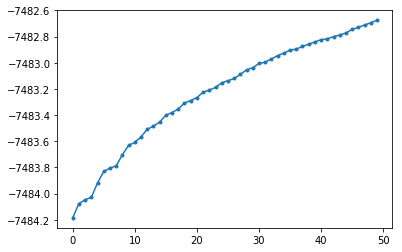

In [33]:
plt.plot([j for i in MM_log_likelihoods_new[0][20:-1] for j in i], marker='.')
plt.show()

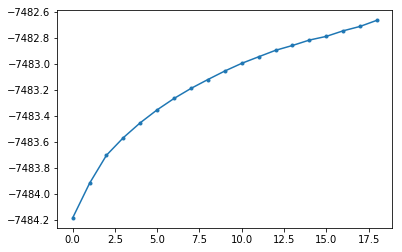

In [32]:
plt.plot([i for i in MM_log_likelihoods_old[0][20:-1]], marker='.')
plt.show()

In [30]:
MM_log_likelihoods_old

[[-7824.236676658971,
  -7713.565033705689,
  -7660.406033856618,
  -7615.550664539941,
  -7579.7969799890725,
  -7553.172869821234,
  -7533.672045082505,
  -7519.635024469906,
  -7509.683678532547,
  -7502.705560312095,
  -7497.69165961245,
  -7494.0314207214,
  -7491.435066261014,
  -7489.497398187552,
  -7488.001389089237,
  -7486.872756018683,
  -7486.076786950933,
  -7485.449998903642,
  -7484.950030960122,
  -7484.520211644084,
  -7484.1858546172925,
  -7483.919002687046,
  -7483.703060976252,
  -7483.567680306419,
  -7483.453017180092,
  -7483.353244778048,
  -7483.265773589869,
  -7483.188619631781,
  -7483.120209514498,
  -7483.0546531452865,
  -7482.995570224152,
  -7482.945165738639,
  -7482.895327809351,
  -7482.858148101447,
  -7482.816519514017,
  -7482.788104170851,
  -7482.7451992514725,
  -7482.711345870608,
  -7482.66390904075,
  -7482.66390904075]]

In [56]:
len(para_traj[0])

39

# Check Contour

In [34]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [77]:
pca = PCA(n_components = 2)
pca.fit(para_traj - para_traj[-1])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [78]:
projectionMat = pca.components_
projectionMat

array([[-0.31473222, -0.21223258,  0.50890385,  0.62483553, -0.09865429,
        -0.05948156, -0.4395767 ],
       [ 0.4061636 ,  0.23367805,  0.49836254,  0.33263692,  0.09144642,
         0.25093611,  0.59167709]])

In [86]:
point  = np.copy(para_traj)

In [89]:
# Contour of the likelihood
step1 = 0.02    # for u (1st principle component)
step2 = 0.02  # for v (2nd principle component)
N1 = 10
N2 = 10
uOffset = - step1 * N1 / 2
vOffset = - step2 * N2 / 2

uValue = np.zeros(N1)
vValue = np.zeros(N2)
Qaux1 = np.zeros((N2, N1))    # Likelihood with ground truth latent
Qaux2 = np.zeros((N2, N1))    # Expected complete data likelihood
Qaux3 = np.zeros((N2, N1))    # Entropy of latent posterior
para_slice = []

for i in range(N1):
    uValue[i] = step1 * (i) + uOffset
    for j in range(N2):
        vValue[j] = step2 * (j) + vOffset

        para_slicePoints = point[-1] + uValue[i] * projectionMat[0] + vValue[j] * projectionMat[1]
        para_slice.append(para_slicePoints)
        para = np.copy(para_slicePoints)
        #print(para)
        
        twobox = twoboxMDP(discount, nq, nr, na, nl, para)
        twobox.setupMDP()
        twobox.solveMDP_sfm()
        ThA = twobox.ThA
        policy = twobox.softpolicy
        pi = np.ones(nq * nq)/ nq /nq  # initialize the estimation of the belief state
        twoboxHMM = HMMtwobox(ThA, policy, pi)
        
        #Qaux1[j, i] = twoboxHMM.likelihood(lat, obs, ThA, policy)  #given latent state
        Qaux2[j, i] = twoboxHMM.computeQaux(obs, ThA, policy) 
        Qaux3[j, i] = twoboxHMM.latent_entr(obs) 

In [90]:
Loglikelihood = Qaux2 + Qaux3

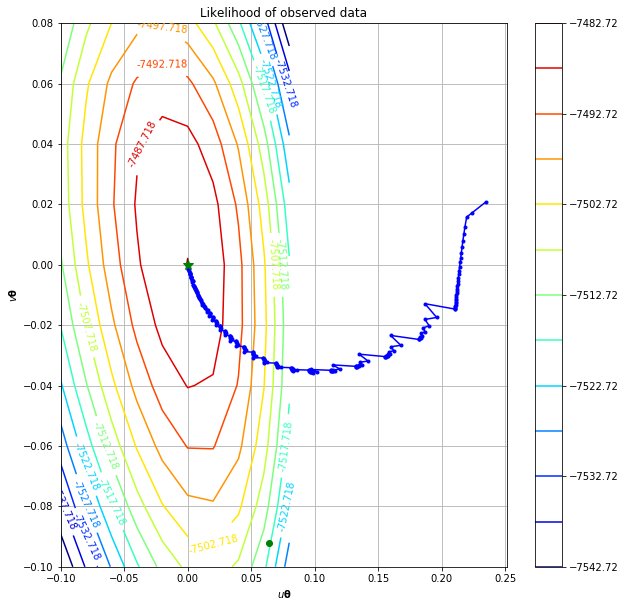

In [115]:
# project the trajectories onto the plane
point_2d = projectionMat.dot((point - point[-1]).T).T   

# true parameters projected onto the plane
true_2d = projectionMat.dot(parameters - point[-1])

fig, ax = plt.subplots(figsize = (10, 10))
uValuemesh, vValuemesh = np.meshgrid(uValue, vValue)
cs3 = plt.contour(uValuemesh, vValuemesh, Loglikelihood, 
                  np.arange(np.min(Loglikelihood), np.max(Loglikelihood), 5), cmap='jet')
#plt.xticks(np.arange(0, 1, 0.1))
#plt.yticks(np.arange(0, 1, 0.1))
plt.plot(point_2d[:, 0], point_2d[:, 1], marker='.', color = 'b')   # projected trajectories
plt.plot(point_2d[-1, 0], point_2d[-1, 1], marker='*', color = 'g', markersize = 10)        # final point
plt.plot(true_2d[0], true_2d[1], marker='o', color = 'g')           # true


ax.grid()
ax.set_title('Likelihood of observed data')
plt.xlabel(r'$u \mathbf{\theta}$', fontsize = 10)
plt.ylabel(r'$v \mathbf{\theta}$', fontsize = 10)
plt.clabel(cs3, inline=1, fontsize=10)
plt.colorbar()
plt.show()

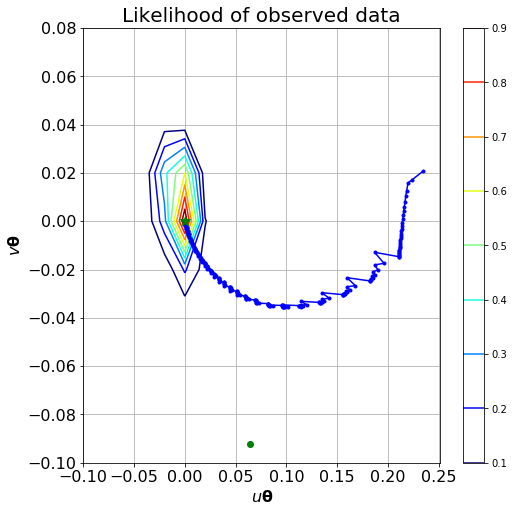

In [116]:
exp_Likelihood = np.exp(Loglikelihood - np.max(Loglikelihood))

fig_contour, ax = plt.subplots(figsize = (8,8))
uValuemesh, vValuemesh = np.meshgrid(uValue, vValue)
cs3 = plt.contour(uValuemesh, vValuemesh, exp_Likelihood, 
                  np.arange(np.min(exp_Likelihood), np.max(exp_Likelihood), 0.1), cmap='jet')
plt.plot(point_2d[:, 0], point_2d[:, 1], marker='.', color = 'b')   # projected trajectories
plt.plot(point_2d[-1, 0], point_2d[-1, 1], marker='*', color = 'g', markersize = 10)        # final point
plt.plot(true_2d[0], true_2d[1], marker='o', color = 'g')           # true


ax.grid()
ax.set_title('Likelihood of observed data', fontsize = 20)
plt.xlabel(r'$u \mathbf{\theta}$', fontsize = 16)
plt.ylabel(r'$v \mathbf{\theta}$', fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
#plt.clabel(cs3, inline=1, fontsize=10)
cb = plt.colorbar()
#cb.ax.set_yticklabels(cb.ax.get_yticklabels(), fontsize=10)
plt.show()

# Check the posterior of the latent states

In [104]:
showlen = 50
showT = range(1000,1000+showlen)

### Based on estimated parameters

In [105]:
para_est = point[-1]
twobox_est = twoboxMDP(discount, nq, nr, na, nl, para_est)
twobox_est.setupMDP()
twobox_est.solveMDP_sfm()
ThA = twobox_est.ThA
policy = twobox_est.softpolicy
pi = np.ones(nq * nq)/ nq /nq  # initialize the estimation of the belief state
twoboxHMM_est = HMMtwobox(ThA, policy, pi)

In [106]:
alpha_est, scale_est = twoboxHMM_est.forward_scale(obs)
beta_est = twoboxHMM_est.backward_scale(obs, scale_est)
gamma_est = twoboxHMM_est.compute_gamma(alpha_est, beta_est)
xi_est = twoboxHMM_est.compute_xi(alpha_est, beta_est, obs)

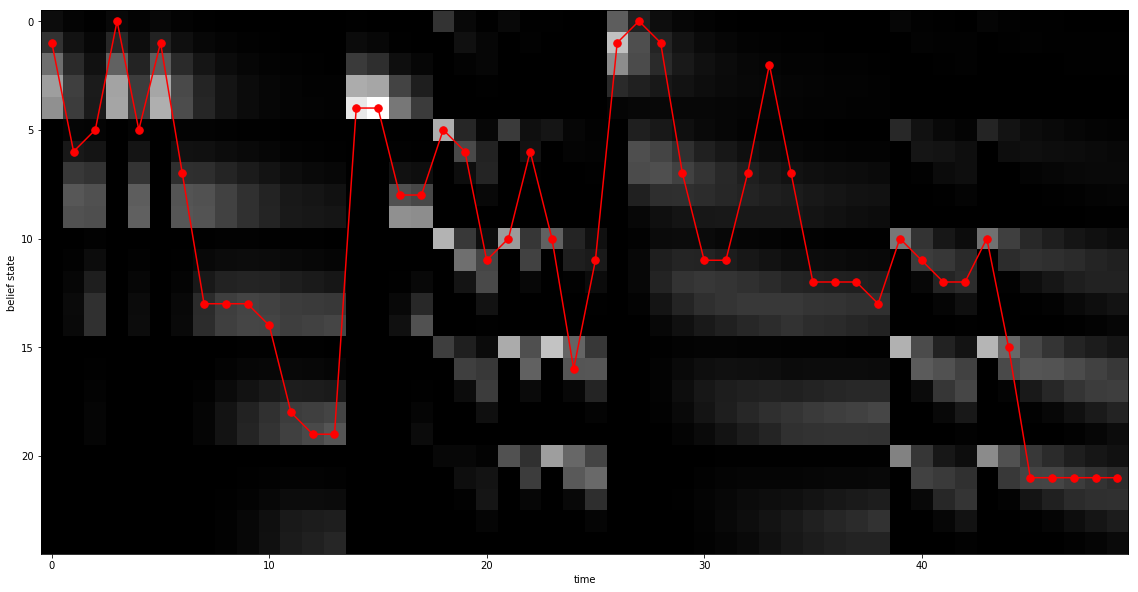

In [107]:
lat_compound = nq * lat[:, 0] + lat[:, 1]

fig, ax = plt.subplots(figsize= (20, 10))
plt.imshow(gamma_est[:, showT], interpolation='Nearest', cmap='gray')
plt.plot(lat_compound[showT], color = 'r',marker ='.', markersize = 15)
plt.xticks(np.arange(0, showlen, 10))
plt.xlabel('time')
plt.ylabel('belief state')

plt.show()

In [108]:
belief1_est = np.sum(np.reshape(gamma_est[:, showT].T, (showlen, nq, nq)), axis = 2)
belief2_est = np.sum(np.reshape(gamma_est[:, showT].T, (showlen, nq, nq)), axis = 1)

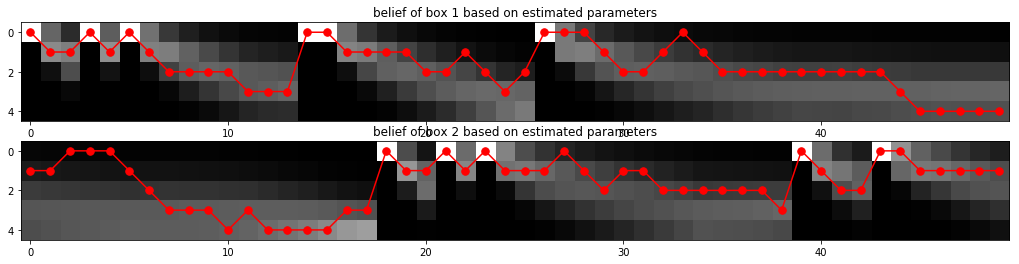

In [109]:
fig = plt.figure(figsize= (20, 4))
ax1 = fig.add_subplot(211)
ax1.imshow(belief1_est.T, interpolation='Nearest', cmap='gray')
ax1.plot(lat[showT, 0], color = 'r',marker ='.', markersize = 15)
ax1.set(title = 'belief of box 1 based on estimated parameters')

ax2 = fig.add_subplot(212)
ax2.imshow(belief2_est.T, interpolation='Nearest', cmap='gray')
ax2.plot(lat[showT, 1], color = 'r',marker ='.', markersize = 15)
ax2.set(title = 'belief of box 2 based on estimated parameters')

plt.show()

### Based on true parameters

In [110]:
para_true = np.copy(parameters)

In [111]:
twobox_true = twoboxMDP(discount, nq, nr, na, nl, para_true)
twobox_true.setupMDP()
twobox_true.solveMDP_sfm()
ThA = twobox_true.ThA
policy = twobox_true.softpolicy
pi = np.ones(nq * nq)/ nq /nq  # initialize the estimation of the belief state
twoboxHMM_true = HMMtwobox(ThA, policy, pi)

In [112]:
alpha_true, scale_true = twoboxHMM_true.forward_scale(obs)
beta_true = twoboxHMM_true.backward_scale(obs, scale_true)
gamma_true = twoboxHMM_true.compute_gamma(alpha_true, beta_true)
xi_true = twoboxHMM_true.compute_xi(alpha_true, beta_true, obs)

In [113]:
belief1_true = np.sum(np.reshape(gamma_true[:, showT].T, (showlen, nq, nq)), axis = 2)
belief2_true = np.sum(np.reshape(gamma_true[:, showT].T, (showlen, nq, nq)), axis = 1)

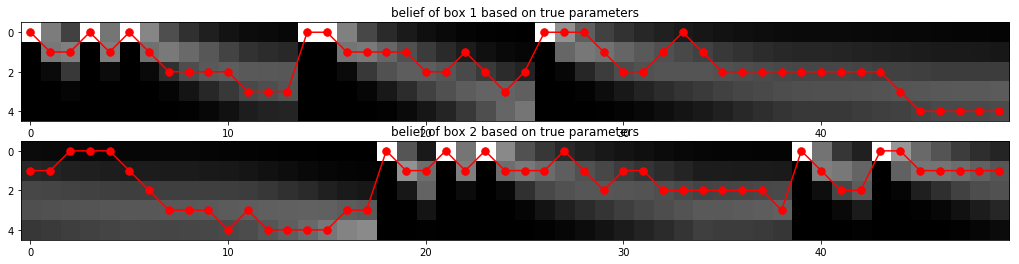

In [114]:
fig = plt.figure(figsize= (20, 4))
ax1 = fig.add_subplot(211)
ax1.imshow(belief1_true.T, interpolation='Nearest', cmap='gray')
ax1.plot(lat[showT, 0], color = 'r',marker ='.', markersize = 15)
ax1.set(title = 'belief of box 1 based on true parameters')

ax2 = fig.add_subplot(212)
ax2.imshow(belief2_true.T, interpolation='Nearest', cmap='gray')
ax2.plot(lat[showT, 1], color = 'r',marker ='.', markersize = 15)
ax2.set(title = 'belief of box 2 based on true parameters')

plt.show()